In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
tokenizer = Tokenizer()

data = open('poesiasDataset.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [13]:
# Inicializa uma lista para armazenar as sequências de entrada
input_sequences = []

# Converte cada linha do corpus em uma sequência de tokens e cria n-gramas
for line in corpus:
    # Converte a linha em uma lista de tokens usando o tokenizer
    token_list = tokenizer.texts_to_sequences([line])[0]
    # Cria n-gramas e adiciona à lista de sequências de entrada
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Preenche as sequências para que todas tenham o mesmo comprimento
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Separa as sequências em previsores (xs) e rótulos (labels)
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

# Converte os rótulos em uma codificação one-hot
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [14]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [15]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [19]:
print(len(ys[6]))

2690


In [17]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [18]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [20]:
# Cria o modelo de rede neural sequencial
model = Sequential()
# Adiciona uma camada de embedding para representar palavras como vetores
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
# Adiciona uma camada LSTM bidirecional com 150 unidades
model.add(Bidirectional(LSTM(150)))
# Adiciona uma camada densa com ativação softmax para prever as palavras
model.add(Dense(total_words, activation='softmax'))

# Define o otimizador Adam com uma taxa de aprendizado de 0.01
adam = Adam(lr=0.01)
# Compila o modelo com a função de perda categorical_crossentropy e o otimizador Adam
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Treina o modelo com as sequências de entrada e os rótulos
history = model.fit(xs, ys, epochs=100, verbose=1)

# Exibe a estrutura do modelo
print(model)

Epoch 1/100
377/377 [==============================] - 15s 30ms/step - loss: 6.7580 - accuracy: 0.0650
Epoch 2/100
377/377 [==============================] - 11s 29ms/step - loss: 6.2315 - accuracy: 0.0767
Epoch 3/100
377/377 [==============================] - 11s 30ms/step - loss: 5.9454 - accuracy: 0.0862
Epoch 4/100
377/377 [==============================] - 12s 32ms/step - loss: 5.6443 - accuracy: 0.1004
Epoch 5/100
377/377 [==============================] - 12s 31ms/step - loss: 5.3026 - accuracy: 0.1167
Epoch 6/100
377/377 [==============================] - 12s 31ms/step - loss: 4.9441 - accuracy: 0.1343
Epoch 7/100
377/377 [==============================] - 12s 31ms/step - loss: 4.5759 - accuracy: 0.1561
Epoch 8/100
377/377 [==============================] - 12s 32ms/step - loss: 4.2040 - accuracy: 0.1876
Epoch 9/100
377/377 [==============================] - 14s 37ms/step - loss: 3.8410 - accuracy: 0.2264
Epoch 10/100
377/377 [==============================] - 17s 44ms/step - l

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

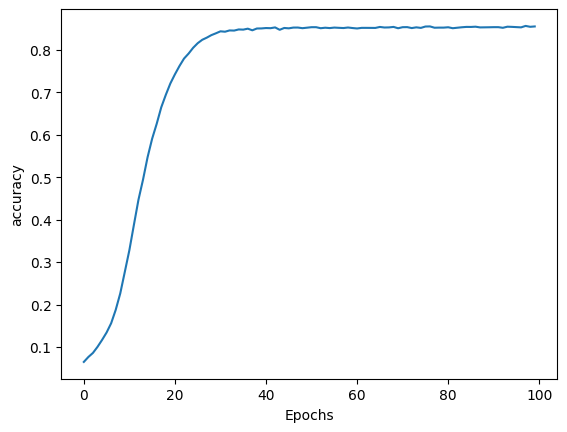

In [22]:
plot_graphs(history, 'accuracy')


In [23]:
# Define o texto inicial para gerar palavras
seed_text = "I've got a bad feeling about this"
next_words = 100

# Gera palavras seguintes com base no texto inicial
for _ in range(next_words):
    # Converte o texto inicial em uma sequência de tokens
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # Preenche a sequência para o comprimento máximo permitido
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Faz a previsão da próxima palavra
    predicted = np.argmax(model.predict(token_list), axis=-1)
    # Obtém a palavra correspondente ao índice previsto
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    # Adiciona a palavra prevista ao texto inicial
    seed_text += " " + output_word

# Exibe o texto gerado
print(seed_text)

1/1 [==============================] - 0s 19ms/step
I've got a bad feeling about this ever before claret drinking rest and rest your ould slip body parted fairest presence presence haste to the fray of your darling forget down and down to the tree of tree for heel and they they might for they sat at vain no more no more died no friends as rest freedom rest the james summers tree raise presence and they bold my bride betrays thee more than thee brings still back back do stand fade fire fairest king leaning renownd and fly part let the machine tune in erin go bragh your skibbereen mary they fell on the rocky
